In [195]:
from typing_extensions import TypedDict

class OverallState(TypedDict):
    topic:str
    title:str
    content:str

In [196]:
from langchain_ollama import ChatOllama

model = ChatOllama(model="llama3.1:latest", temperature=0)

title_prompt = """Generate a better title for the blog for the given topic 
        topic:
        {topic}
"""

content_prompt = """Generate a best content for the blog for the given topic
        topic:
        {topic}
"""

In [197]:
from pydantic import BaseModel

class Title(BaseModel):
    title: str = "Default Title"

class Content(BaseModel):
    content: str = "Default Content"

In [198]:
def title_node(state: dict):
    print(state, "prompt")
    prompt = title_prompt.format(topic=state["topic"])
    response = model.with_structured_output(Title).invoke(prompt)
    return {"title": response.title}  # Return with the key "title", not state["title"]

def content_node(state: dict):
    prompt = content_prompt.format(topic=state["topic"])
    response = model.with_structured_output(Content).invoke(prompt)
    print(prompt, "prompt")
    return {"content": response.content}  # Return with the key "content", not state["content"]


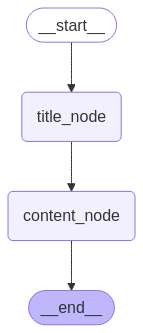

In [199]:
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display

blog_generator = StateGraph(OverallState)

blog_generator.add_node("title_node", title_node)
blog_generator.add_node("content_node", content_node)

blog_generator.add_edge(START, "title_node")
blog_generator.add_edge("title_node", "content_node")
blog_generator.add_edge("content_node", END)

blog  = blog_generator.compile()
display(Image(blog.get_graph(xray=True).draw_mermaid_png()))

In [200]:
blog.invoke({
    "topic": "AI Agents",
    "title": "",  # Initialize with empty strings
    "content": ""
})

{'topic': 'AI Agents', 'title': '', 'content': ''} prompt
Generate a best content for the blog for the given topic
        topic:
        AI Agents
 prompt


{'topic': 'AI Agents',
 'title': 'Exploring the Capabilities of AI Agents',
 'content': 'AI agents are artificial intelligence systems designed to perform specific tasks on behalf of humans. They can be used in various applications, including customer service, data analysis, and decision-making.'}